In [1]:
%matplotlib inline
import tellurium as te

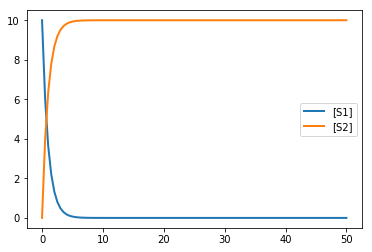

In [3]:
model = """
model test
    compartment C1;
    C1 = 1.0;
    species S1, S2;

    S1 = 10.0;
    S2 = 0.0;
    S1 in C1; S2 in C1;
    J1: S1 -> S2; k1*S1;

    k1 = 1.0;
end
"""
# load models
r = te.loada(model)

# simulate from 0 to 50 with 100 steps
r.simulate(0, 50, 100)
# plot the simulation
r.plot()


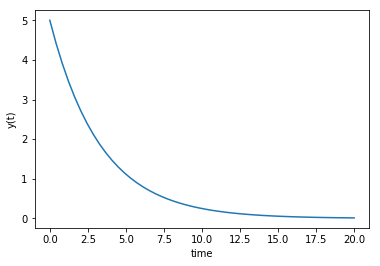

In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(y,t):
    k = 0.3
    dydt = -k * y
    return dydt

# initial condition
y0 = 5

# time points
t = np.linspace(0,20)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

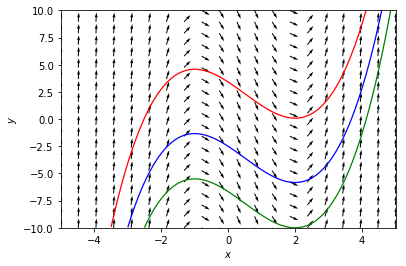

In [6]:
import matplotlib.pyplot as plt
from scipy import *
from scipy import integrate
from scipy.integrate import ode
import numpy as np

fig = plt.figure(num=1)
ax=fig.add_subplot(111)

## Vector field function
def vf(t,x):
  dx=np.zeros(2)
  dx[0]=1
  dx[1]=x[0]**2-x[0]-2
  return dx

#Solution curves
t0=0
tEnd=10
dt=0.01
#
r = ode(vf).set_integrator('lsoda', method='bdf',max_step=dt)
ic=[[-3.5,-10], [-3,-10], [-2.5,-10]]
color=['r','b','g']
for k in range(len(ic)):
    Y=[];T=[];S=[];
    r.set_initial_value(ic[k], t0).set_f_params()
    while r.successful() and r.t +dt < tEnd:
        r.integrate(r.t+dt)
        Y.append(r.y)

    S=np.array(np.real(Y))
    ax.plot(S[:,0],S[:,1], color = color[k], lw = 1.25)

#Vector field
X,Y = np.meshgrid( np.linspace(-5,5,20),np.linspace(-10,10,20) )
U = 1
V = X**2-X-2
#Normalize arrows
N = np.sqrt(U**2+V**2)  
U2, V2 = U/N, V/N
ax.quiver( X,Y,U2, V2)


plt.xlim([-5,5])
plt.ylim([-10,10])
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()